In [1]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tslearn scikit-learn

In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import ast
from sklearn.decomposition import PCA
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

In [4]:
json_file = "C:\\Users\\tigra\\OneDrive\\Documents\\cleaned_df.jsonl"

In [5]:
timestamps = []
channel_x = []
channel_y = []

with open(json_file, 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            timestamps.append(data['timestamp'])
            channel_x.append(data['channel_x'])
            channel_y.append(data['channel_y'])
            #print(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")


time_series_data = pd.DataFrame({
    'timestamp': timestamps,
    'channel_x': channel_x,
    'channel_y': channel_y
})

In [6]:
time_series_data

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0...."
1,9:39:49,"[-0.3132895666, -0.0143246711, 0.0585480222, -...","[0.7455526429, -0.9193375962, 0.9783047733, -0..."
2,9:39:59,"[-0.1941087483, -0.2919947281, -0.6816562247, ...","[0.3501117451, -0.4537091558, -1.3679966717, -..."
3,9:40:9,"[0.0933388765, -0.0111775116, 0.0284666356, -0...","[-2.1192795178, 0.4437364412, -0.4180832858, 0..."
4,9:40:19,"[-0.3346322388, 0.2124313304, 0.568905011, 0.8...","[2.0316917182, 0.3680117201, -0.7623467467, -0..."
...,...,...,...
2798,17:25:59,"[0.0571303255, 0.0167320325, -0.1312956609, -0...","[-0.2585808797, 0.4511690181, 1.3718370909, -0..."
2799,17:26:9,"[0.7842501127, 0.6485894692, 0.884297264, 0.24...","[-0.8001867618, -0.6901360987, 0.2612386972, 1..."
2800,17:26:19,"[0.542245385, 0.9750843589, 0.6135731943, 0.73...","[0.0708408103, -0.585789414, -0.2912445529, 0...."
2801,17:26:29,"[-0.1005815044, 0.1743217626, 0.6969714747, 0....","[-1.461029906, 0.1401113917, 2.7590324291, 0.3..."


In [7]:
time_series_data_dtw = time_series_data.copy()
time_series_data_dtw

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0...."
1,9:39:49,"[-0.3132895666, -0.0143246711, 0.0585480222, -...","[0.7455526429, -0.9193375962, 0.9783047733, -0..."
2,9:39:59,"[-0.1941087483, -0.2919947281, -0.6816562247, ...","[0.3501117451, -0.4537091558, -1.3679966717, -..."
3,9:40:9,"[0.0933388765, -0.0111775116, 0.0284666356, -0...","[-2.1192795178, 0.4437364412, -0.4180832858, 0..."
4,9:40:19,"[-0.3346322388, 0.2124313304, 0.568905011, 0.8...","[2.0316917182, 0.3680117201, -0.7623467467, -0..."
...,...,...,...
2798,17:25:59,"[0.0571303255, 0.0167320325, -0.1312956609, -0...","[-0.2585808797, 0.4511690181, 1.3718370909, -0..."
2799,17:26:9,"[0.7842501127, 0.6485894692, 0.884297264, 0.24...","[-0.8001867618, -0.6901360987, 0.2612386972, 1..."
2800,17:26:19,"[0.542245385, 0.9750843589, 0.6135731943, 0.73...","[0.0708408103, -0.585789414, -0.2912445529, 0...."
2801,17:26:29,"[-0.1005815044, 0.1743217626, 0.6969714747, 0....","[-1.461029906, 0.1401113917, 2.7590324291, 0.3..."


In [8]:
#All data seems to have loaded correctly and the lengths are similar. Proceeding to cluster.

In [9]:
#Store'channel_x' and 'channel_y' columns as lists
data_x = np.array(time_series_data['channel_x'].tolist())
data_y = np.array(time_series_data['channel_y'].tolist())

In [10]:
# Initialize TimeSeriesKMeans with DTW metric for 4 clusters
model_x = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=0)
model_y = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=0)

In [11]:
# Fit the model and predict clusters
clusters_x = model_x.fit_predict(data_x)
clusters_y = model_y.fit_predict(data_y)

In [12]:
# Add clusters back to the DataFrame
time_series_data['cluster_x'] = clusters_x
time_series_data['cluster_y'] = clusters_y

In [13]:
time_series_data

,timestamp,channel_x,channel_y,cluster_x,cluster_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0....",3,1
1,9:39:49,"[-0.3132895666, -0.0143246711, 0.0585480222, -...","[0.7455526429, -0.9193375962, 0.9783047733, -0...",1,2
2,9:39:59,"[-0.1941087483, -0.2919947281, -0.6816562247, ...","[0.3501117451, -0.4537091558, -1.3679966717, -...",2,1
3,9:40:9,"[0.0933388765, -0.0111775116, 0.0284666356, -0...","[-2.1192795178, 0.4437364412, -0.4180832858, 0...",0,2
4,9:40:19,"[-0.3346322388, 0.2124313304, 0.568905011, 0.8...","[2.0316917182, 0.3680117201, -0.7623467467, -0...",3,2
...,...,...,...,...,...
2798,17:25:59,"[0.0571303255, 0.0167320325, -0.1312956609, -0...","[-0.2585808797, 0.4511690181, 1.3718370909, -0...",0,3
2799,17:26:9,"[0.7842501127, 0.6485894692, 0.884297264, 0.24...","[-0.8001867618, -0.6901360987, 0.2612386972, 1...",0,1
2800,17:26:19,"[0.542245385, 0.9750843589, 0.6135731943, 0.73...","[0.0708408103, -0.585789414, -0.2912445529, 0....",3,0
2801,17:26:29,"[-0.1005815044, 0.1743217626, 0.6969714747, 0....","[-1.461029906, 0.1401113917, 2.7590324291, 0.3...",1,1


In [14]:
cluster_x = time_series_data['cluster_x'].tolist()
cluster_y = time_series_data['cluster_y'].tolist()

In [15]:
def fix_timestamp_format(ts):
    # Check if the timestamp is in HH:MM:SS format
    parts = ts.split(":")
    # Ensure minutes and seconds have two digits each
    if len(parts) == 3:
        hour, minute, second = parts
        minute = minute.zfill(2)  #Add leading zero if missing
        second = second.zfill(2)  #Add leading zero if missing
        return f"{hour}:{minute}:{second}"
    return ts  
    
time_series_data['timestamp'] = time_series_data['timestamp'].apply(fix_timestamp_format)

C:\Users\tigra\AppData\Local\Temp\ipykernel_12484\3610437514.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])


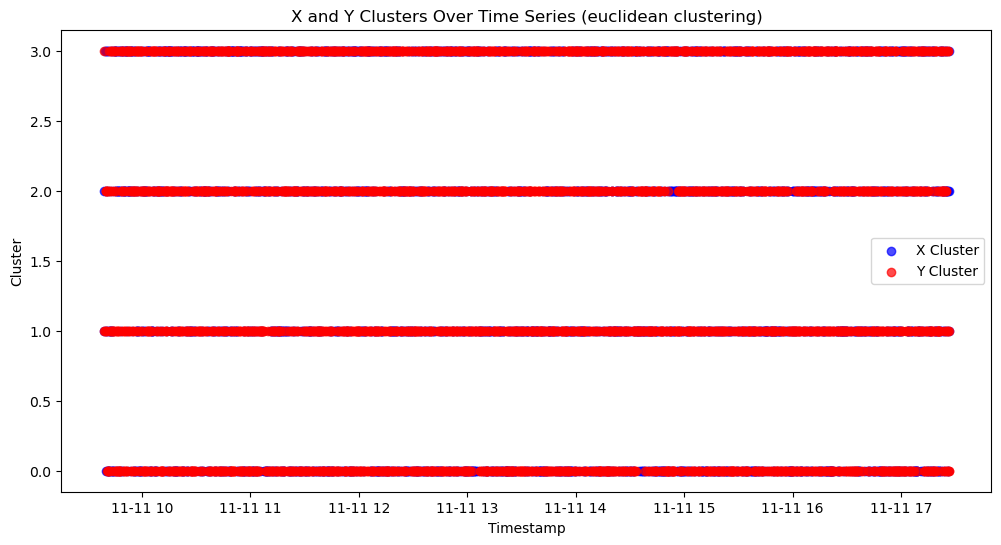

In [16]:
time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])

plt.figure(figsize=(12, 6))

# Plot x cluster over time as dots
plt.scatter(time_series_data['timestamp'], time_series_data['cluster_x'], label='X Cluster', color='blue', alpha=0.7)

# Plot y cluster over time as dots
plt.scatter(time_series_data['timestamp'], time_series_data['cluster_y'], label='Y Cluster', color='red', alpha=0.7)

# Labels and title
plt.xlabel("Timestamp")
plt.ylabel("Cluster")
plt.title("X and Y Clusters Over Time Series (euclidean clustering)")
plt.legend()

# Show plot
plt.show()

In [17]:
#Let's do the same with DTW

In [18]:
#Truncate the data. Too long....

time_series_data_dtw = time_series_data_dtw.iloc[::20].reset_index(drop=True)

time_series_data_dtw

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0...."
1,9:42:59,"[-0.3835769824, -0.0005789752, -0.4944448265, ...","[-1.2657627841, -1.53700228, 1.5356326345, 1.0..."
2,9:46:19,"[0.5424614582, 0.0428181974, -1.3411936352, -1...","[0.2012202817, 1.0529283021, -0.4671056291, -1..."
3,9:49:39,"[-0.0024716294, 0.5516104976, 0.2954781936, -1...","[1.0085640774, -0.9551936425, -0.8783607743, 0..."
4,9:52:59,"[0.6992210087, 1.7723526814, 2.7459154359, 2.1...","[0.0650274267, -0.1232291274, -1.6270134092, 0..."
...,...,...,...
136,17:12:59,"[0.1805700799, -0.6127965873, -0.6460903778, -...","[0.2637984822, 1.0614745159, 1.6592893704, -0...."
137,17:16:19,"[0.7958817697, -0.0302492395, 0.5876698894, -0...","[-0.6292374135, 0.335148553, -0.0949378128, -0..."
138,17:19:39,"[1.890264312, 1.406559611, 1.5141924833, 1.551...","[0.3447015351, -0.1509656698, -0.2108198229, -..."
139,17:22:59,"[0.6620399605, 0.610106471, 1.6195812187, 1.11...","[1.7959673218, 0.4490968321, -1.3276922257, -0..."


In [19]:
data_x = np.array(time_series_data_dtw['channel_x'].tolist())
data_y = np.array(time_series_data_dtw['channel_y'].tolist())

In [20]:
# Initialize TimeSeriesKMeans with DTW metric for 4 clusters
model_x = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)
model_y = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)

In [21]:
# Fit the model and predict clusters
clusters_x = model_x.fit_predict(data_x)
clusters_y = model_y.fit_predict(data_y)

In [22]:
# Add clusters back to the DataFrame
time_series_data_dtw['cluster_x'] = clusters_x
time_series_data_dtw['cluster_y'] = clusters_y

In [23]:
time_series_data_dtw

,timestamp,channel_x,channel_y,cluster_x,cluster_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0....",2,3
1,9:42:59,"[-0.3835769824, -0.0005789752, -0.4944448265, ...","[-1.2657627841, -1.53700228, 1.5356326345, 1.0...",2,3
2,9:46:19,"[0.5424614582, 0.0428181974, -1.3411936352, -1...","[0.2012202817, 1.0529283021, -0.4671056291, -1...",2,3
3,9:49:39,"[-0.0024716294, 0.5516104976, 0.2954781936, -1...","[1.0085640774, -0.9551936425, -0.8783607743, 0...",2,3
4,9:52:59,"[0.6992210087, 1.7723526814, 2.7459154359, 2.1...","[0.0650274267, -0.1232291274, -1.6270134092, 0...",2,3
...,...,...,...,...,...
136,17:12:59,"[0.1805700799, -0.6127965873, -0.6460903778, -...","[0.2637984822, 1.0614745159, 1.6592893704, -0....",3,3
137,17:16:19,"[0.7958817697, -0.0302492395, 0.5876698894, -0...","[-0.6292374135, 0.335148553, -0.0949378128, -0...",3,3
138,17:19:39,"[1.890264312, 1.406559611, 1.5141924833, 1.551...","[0.3447015351, -0.1509656698, -0.2108198229, -...",3,3
139,17:22:59,"[0.6620399605, 0.610106471, 1.6195812187, 1.11...","[1.7959673218, 0.4490968321, -1.3276922257, -0...",1,3


In [48]:
time_series_data_dtw['timestamp'] = time_series_data_dtw['timestamp'].apply(fix_timestamp_format)

In [50]:
cluster_x_dtw = time_series_data_dtw['cluster_x'].tolist()
cluster_y_dtw = time_series_data_dtw['cluster_y'].tolist()

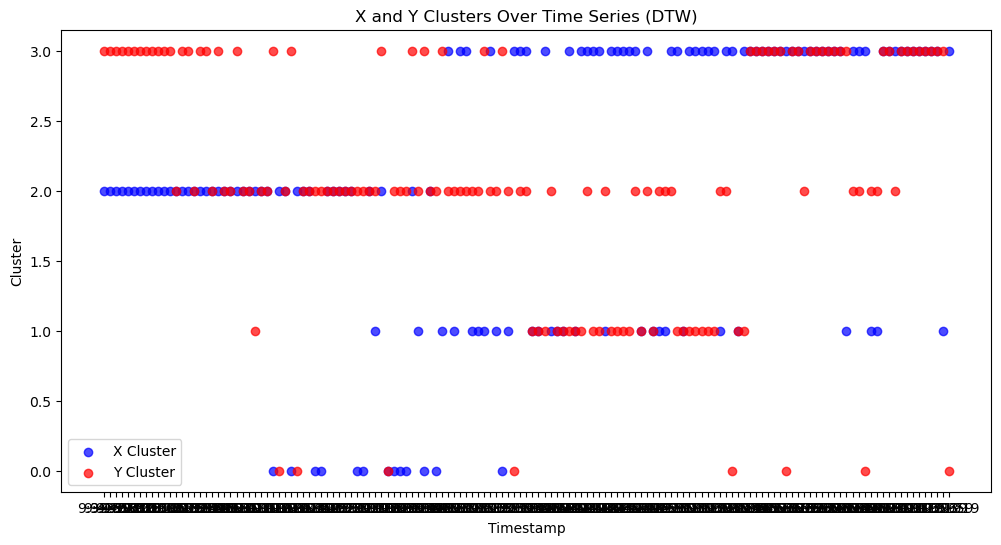

In [52]:
time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])

plt.figure(figsize=(12, 6))

# Plot x cluster over time as dots
plt.scatter(time_series_data_dtw['timestamp'], time_series_data_dtw['cluster_x'], label='X Cluster', color='blue', alpha=0.7)

# Plot y cluster over time as dots
plt.scatter(time_series_data_dtw['timestamp'], time_series_data_dtw['cluster_y'], label='Y Cluster', color='red', alpha=0.7)

# Labels and title
plt.xlabel("Timestamp")
plt.ylabel("Cluster")
plt.title("X and Y Clusters Over Time Series (DTW)")
plt.legend()

# Show plot
plt.show()